# **TITANIC SHIP SURVIVAL PREDICTION**
*   Full Name: Arun Kumar
*   Email    : arunkumar12012001@gmail.com
*   Batch    : 30
*   Domain   : Data Analytics
*   company: TechnoHacks
*   Task:     1











# **Importing Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **missing_values**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Check Datatype**

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# **DATA CLEAN**:-*This line of code calculates the mean (average) of the values in the Age column of the dataframe df.*

In [ ]:
df['Age'].mean()

29.69911764705882

# **mean()**:-*This line of code calculates the mean (average) of the values in the Age column for each unique value in the Pclass column.*

In [ ]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
def modify_age(c):
  Age=c[0]
  Pclass=c[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 40
    elif Pclass==2:
      return 28
    else:
      return 24
  else:
    return(Age)

**This line of code applies the modify_age function to each row of the dataframe df.**

In [ ]:
df['Age'] = df[['Age', 'Pclass']].apply(modify_age, axis=1)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **DROP COLUMN**

In [ ]:
df.drop("Embarked", axis=1, inplace=True)

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

# **Analysis**

**TOP 5 ROWS**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


# **LAST 5 ROWS**

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.155073,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.316594,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Fare'>

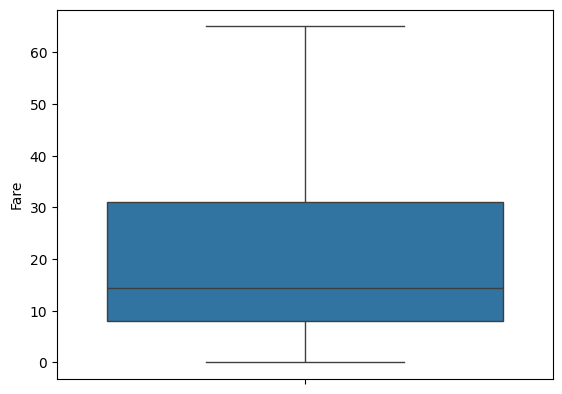

In [ ]:
sns.boxplot(df.Fare,showfliers=False)

<Axes: ylabel='SibSp'>

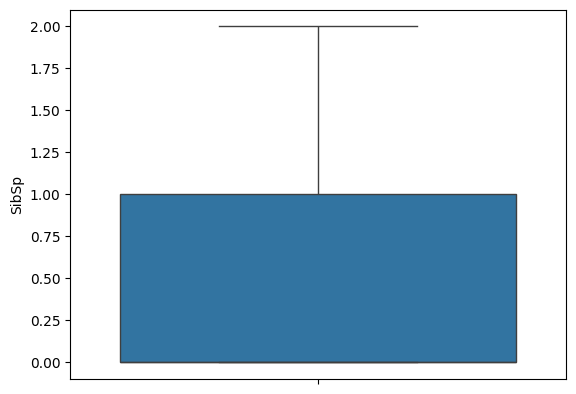

In [ ]:
sns.boxplot(df.SibSp,showfliers=False)

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#**let's visualize the count of survivals wrt Pclass**

<Axes: xlabel='Survived', ylabel='count'>

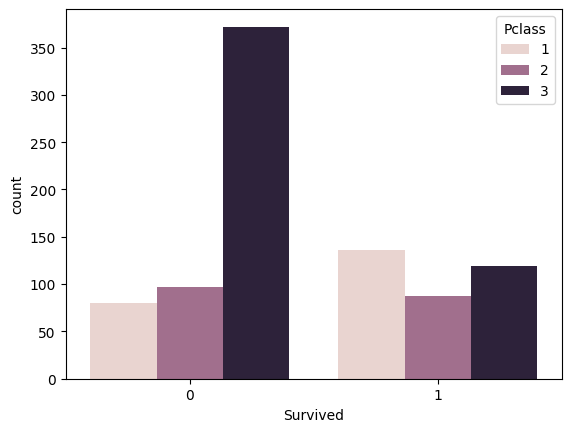

In [ ]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [ ]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

# **ler's visualize the count of Survivals wrt Gender**

<Axes: xlabel='Sex', ylabel='count'>

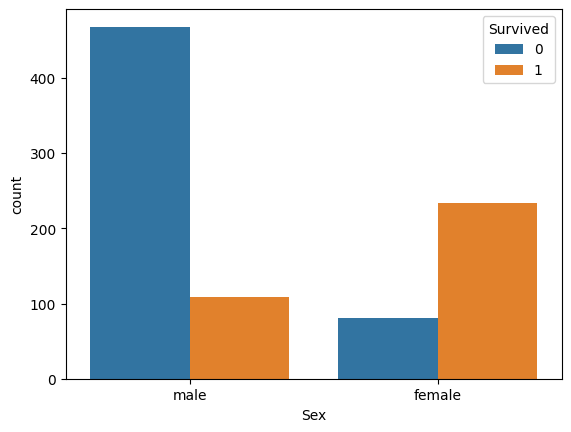

In [ ]:
sns.countplot(x=df['Sex'], hue=df['Survived'])